# MATH387 Lab Final
Kabilan Sriranjan

22/04/18

In [140]:
import math
import numpy as np
import scipy.special as scp
import matplotlib.pyplot as plt

## Question 1.

Trivial.

## Question 2.

In [222]:
def f(a, x):
    if x>0:
        return x**a
    return 0

def maxNorm(xs, ys):
    return np.max(np.abs(np.array(xs)-np.array(ys)))

def bucket(x, n):
    for k in range(1, n+1):
        if (-1+k*2/n) > x:
            return -1+(k*2-1)/n
    return 1-1/n

def pwConst(n, a, x):
    return f(a, bucket(x,n))

def pwConstNs(a, ns):
    data = []
    dx = np.linspace(-1,1,200)
    data.append(dx)
    y = []
    for x in dx:
        y.append(f(a, x))
    data.append(y)
    for n in ns:
        dy = []
        for x in dx:
            dy.append(pwConst(n, a, x))
        data.append(dy)
    return data

def pwConstTest(aList, ns):
    rs = []
    for a in aList:
        data = np.array(pwConstNs(a, ns))
        maxima = []
        for i in range(2, len(data)):
            maxima.append(maxNorm(data[1], data[i]))
        fit = np.polyfit(np.log(ns),np.log(maxima), deg=1)
        rs.append(-fit[0])
    return rs

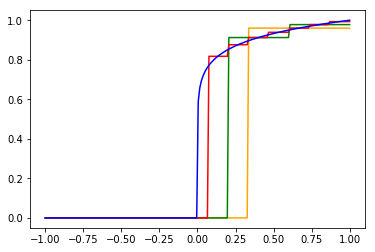

In [223]:
data = pwConstNs(0.1, [3,5,15])
plt.plot(data[0], data[2], color="orange")
plt.plot(data[0], data[3], color="green")
plt.plot(data[0], data[4], color="red")
plt.plot(data[0], data[1], color="blue")
plt.show()

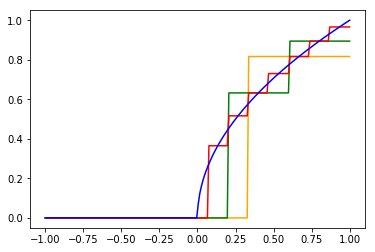

In [224]:
data = pwConstNs(0.5, [3,5,15])
plt.plot(data[0], data[2], color="orange")
plt.plot(data[0], data[3], color="green")
plt.plot(data[0], data[4], color="red")
plt.plot(data[0], data[1], color="blue")
plt.show()

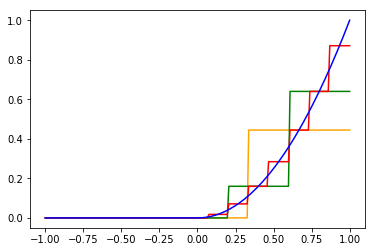

In [225]:
data = pwConstNs(2, [3,5,15])
plt.plot(data[0], data[2], color="orange")
plt.plot(data[0], data[3], color="green")
plt.plot(data[0], data[4], color="red")
plt.plot(data[0], data[1], color="blue")
plt.show()

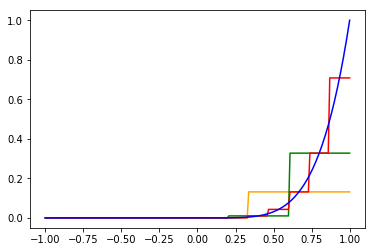

In [226]:
data = pwConstNs(5, [3,5,15])
plt.plot(data[0], data[2], color="orange")
plt.plot(data[0], data[3], color="green")
plt.plot(data[0], data[4], color="red")
plt.plot(data[0], data[1], color="blue")
plt.show()

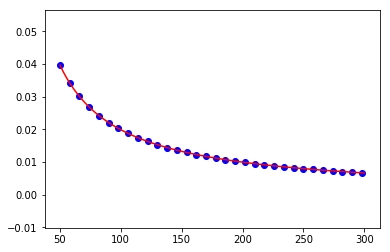

In [242]:
ns = np.array(range(50,300,8))
data = np.array(pwConstNs(2, ns))
maxima = []
for i in range(2, len(data)):
    maxima.append(maxNorm(data[1], data[i]))

fit = np.polyfit(np.log(ns),np.log(maxima), deg=1)
xs = np.linspace(50,300,100)
ys = np.exp(fit[1])*xs**fit[0]
plt.scatter(ns, maxima, color="blue")
plt.plot(xs, ys, color="red")
plt.show()

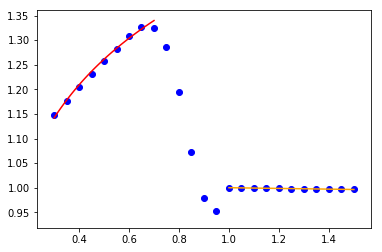

In [391]:
aList = np.linspace(0.3,1.5,25)
rList = pwConstTest(aList, ns)
aLeft = aList[:8]
rLeft = rList[:8]
aRight = aList[-8:]
rRight = rList[-8:]
fitL = np.polyfit(np.log(aLeft), rLeft, deg=1)
fitR = np.polyfit(aRight, rRight, deg=1)
left = np.linspace(0.3,0.7,50)
right = np.linspace(1,1.5,50)
plt.scatter(aList, rList, color="blue")
plt.plot(left, fitL[1]+fitL[0]*np.log(left), color="red")
plt.plot(right, fitR[1]+fitR[0]*right, color="orange")
plt.show()

## Question 3.

In [248]:
def pwLin(n, a, x):
    x1 = bucket(x,n) - 1/n
    x2 = x1 + 2/n
    y1 = f(a, x1)
    y2 = f(a, x2)
    slope = (y2-y1)/(x2-x1)
    rise = slope*(x-x1)
    return y1+rise

def pwLinNs(a, ns):
    data = []
    dx = np.linspace(-1,1,200)
    data.append(dx)
    y = []
    for x in dx:
        y.append(f(a, x))
    data.append(y)
    for n in ns:
        dy = []
        for x in dx:
            dy.append(pwLin(n, a, x))
        data.append(dy)
    return data

def pwLinTest(aList, ns):
    rs = []
    for a in aList:
        data = np.array(pwLinNs(a, ns))
        maxima = []
        for i in range(2, len(data)):
            maxima.append(maxNorm(data[1], data[i]))
        fit = np.polyfit(np.log(ns),np.log(maxima), deg=1)
        rs.append(-fit[0])
    return rs

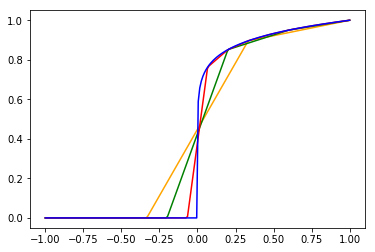

In [227]:
data = pwLinNs(0.1, [3,5,15])
plt.plot(data[0], data[2], color="orange")
plt.plot(data[0], data[3], color="green")
plt.plot(data[0], data[4], color="red")
plt.plot(data[0], data[1], color="blue")
plt.show()

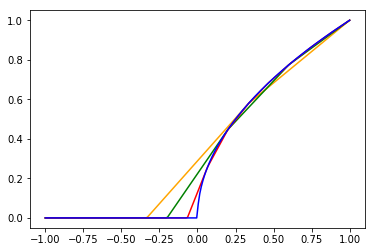

In [228]:
data = pwLinNs(0.5, [3,5,15])
plt.plot(data[0], data[2], color="orange")
plt.plot(data[0], data[3], color="green")
plt.plot(data[0], data[4], color="red")
plt.plot(data[0], data[1], color="blue")
plt.show()

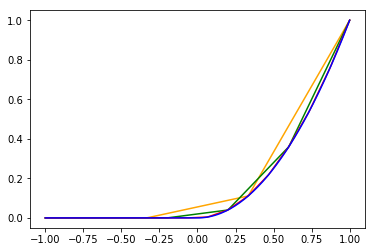

In [229]:
data = pwLinNs(2, [3,5,15])
plt.plot(data[0], data[2], color="orange")
plt.plot(data[0], data[3], color="green")
plt.plot(data[0], data[4], color="red")
plt.plot(data[0], data[1], color="blue")
plt.show()

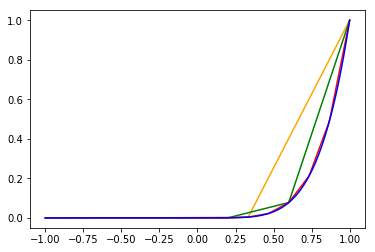

In [230]:
data = pwLinNs(5, [3,5,15])
plt.plot(data[0], data[2], color="orange")
plt.plot(data[0], data[3], color="green")
plt.plot(data[0], data[4], color="red")
plt.plot(data[0], data[1], color="blue")
plt.show()

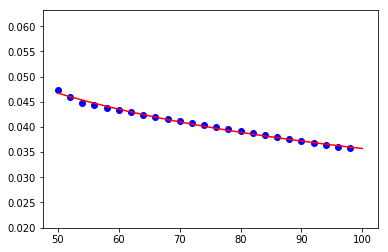

In [265]:
ns = np.array(range(50,100,2))
data = np.array(pwLinNs(0.5, ns))
maxima = []
for i in range(2, len(data)):
    maxima.append(maxNorm(data[1], data[i]))

fit = np.polyfit(np.log(ns),np.log(maxima), deg=1)
xs = np.linspace(50,100,100)
ys = np.exp(fit[1])*xs**fit[0]
plt.scatter(ns, maxima, color="blue")
plt.plot(xs, ys, color="red")
plt.show()

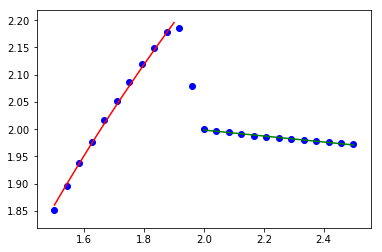

In [394]:
aList = np.linspace(1.5,2.5,25)
rList = pwLinTest(aList, ns)
aLeft = aList[:11]
rLeft = rList[:11]
aRight = aList[-13:]
rRight = rList[-13:]
fitL = np.polyfit(np.log(aLeft), rLeft, deg=1)
fitR = np.polyfit(aRight, rRight, deg=1)
left = np.linspace(1.5,1.9,50)
right = np.linspace(2,2.5,50)
plt.scatter(aList, rList, color="blue")
plt.plot(left, fitL[1]+fitL[0]*np.log(left), color="red")
plt.plot(right, fitR[1]+fitR[0]*right, color="green")
plt.show()

## Question 4.

In [343]:
def b(k, n, x):
    z = (x + 1)/2
    return scp.binom(n,k)*(z**k)*(1-z)**(n-k)

def B(n, a, x):
    total = 0
    for k in range(0, n+1):
        total = total + f(a, -1 + 2*k/n)*b(k, n, x)
    return total
    
def bernNs(a, ns):
    data = []
    dx = np.linspace(-1,1,200)
    data.append(dx)
    y = []
    for x in dx:
        y.append(f(a, x))
    data.append(y)
    for n in ns:
        dy = []
        for x in dx:
            dy.append(B(n, a, x))
        data.append(dy)
    return data

def bernTest(aList, ns):
    rs = []
    for a in aList:
        data = np.array(bernNs(a, ns))
        maxima = []
        for i in range(2, len(data)):
            maxima.append(maxNorm(data[1], data[i]))
        fit = np.polyfit(np.log(ns),np.log(maxima), deg=1)
        rs.append(-fit[0])
    return rs

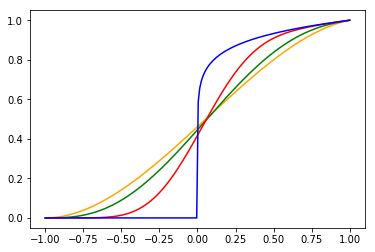

In [337]:
data = bernNs(0.1, [3,5,15])
plt.plot(data[0], data[2], color="orange")
plt.plot(data[0], data[3], color="green")
plt.plot(data[0], data[4], color="red")
plt.plot(data[0], data[1], color="blue")
plt.show()

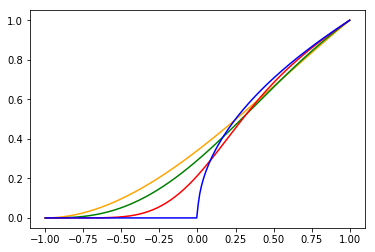

In [340]:
data = bernNs(0.5, [3,5,15])
plt.plot(data[0], data[2], color="orange")
plt.plot(data[0], data[3], color="green")
plt.plot(data[0], data[4], color="red")
plt.plot(data[0], data[1], color="blue")
plt.show()

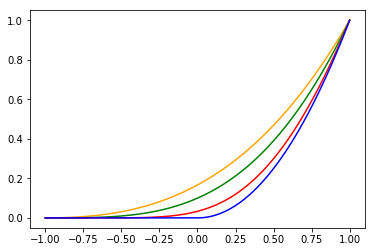

In [341]:
data = bernNs(2, [3,5,15])
plt.plot(data[0], data[2], color="orange")
plt.plot(data[0], data[3], color="green")
plt.plot(data[0], data[4], color="red")
plt.plot(data[0], data[1], color="blue")
plt.show()

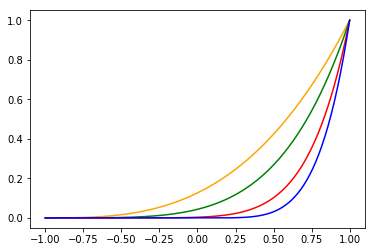

In [344]:
data = bernNs(5, [3,5,15])
plt.plot(data[0], data[2], color="orange")
plt.plot(data[0], data[3], color="green")
plt.plot(data[0], data[4], color="red")
plt.plot(data[0], data[1], color="blue")
plt.show()

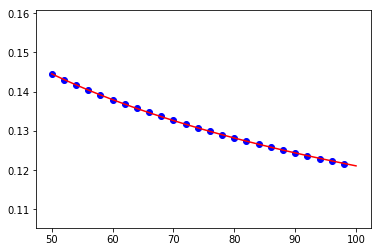

In [382]:
ns = np.array(range(50,100,2))
data = np.array(bernNs(0.5, ns))
maxima = []
for i in range(2, len(data)):
    maxima.append(maxNorm(data[1], data[i]))

fit = np.polyfit(np.log(ns),np.log(maxima), deg=1)
xs = np.linspace(50,100,100)
ys = np.exp(fit[1])*xs**fit[0]
plt.scatter(ns, maxima, color="blue")
plt.plot(xs, ys, color="red")
plt.show()

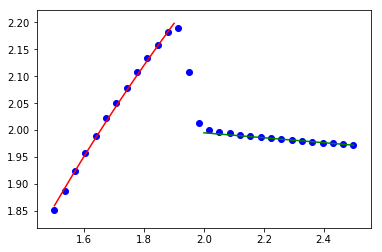

In [406]:
aList = np.linspace(1.5,2.5,30)
rList = pwLinTest(aList, ns)
aLeft = aList[:13]
rLeft = rList[:13]
aRight = aList[-8:]
rRight = rList[-8:]
fitL = np.polyfit(np.log(aLeft), rLeft, deg=1)
fitR = np.polyfit(aRight, rRight, deg=1)
left = np.linspace(1.5,1.9,50)
right = np.linspace(2,2.5,50)
plt.scatter(aList, rList, color="blue")
plt.plot(left, fitL[1]+fitL[0]*np.log(left), color="red")
plt.plot(right, fitR[1]+fitR[0]*right, color="green")
plt.show()

## Question 5.

In [424]:
def chebyNodes(n):
    k = np.array(range(1,n+1))
    return np.cos((2*k-1)*np.pi/(2*n))[::-1]

def interp(n, a):
    nodes = chebyNodes(n)
    V = np.vander(nodes)
    b = []
    for node in nodes:
        b.append(f(a, node))
    alpha = np.linalg.solve(V, b)
    return alpha

def evalPolynomial(alpha, x):
    total = 0
    x2 = 1
    for a in alpha[::-1]:
        total = total+a*x2
        x2 = x2*x
    return total
    
def chebyNs(a, ns):
    data = []
    dx = np.linspace(-1,1,200)
    data.append(dx)
    y = []
    for x in dx:
        y.append(f(a, x))
    data.append(y)
    for n in ns:
        alpha = interp(n, a)
        dy = []
        for x in dx:
            dy.append(evalPolynomial(alpha, x))
        data.append(dy)
    return data

def chebyTest(aList, ns):
    rs = []
    for a in aList:
        data = np.array(chebyNs(a, ns))
        maxima = []
        for i in range(2, len(data)):
            maxima.append(maxNorm(data[1], data[i]))
        fit = np.polyfit(np.log(ns),np.log(maxima), deg=1)
        rs.append(-fit[0])
    return rs

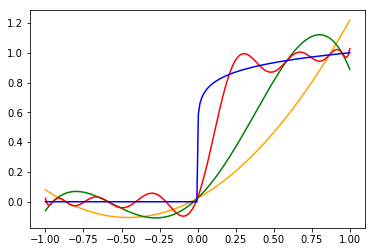

In [429]:
data = chebyNs(0.1, [3,5,15])
plt.plot(data[0], data[2], color="orange")
plt.plot(data[0], data[3], color="green")
plt.plot(data[0], data[4], color="red")
plt.plot(data[0], data[1], color="blue")
plt.show()

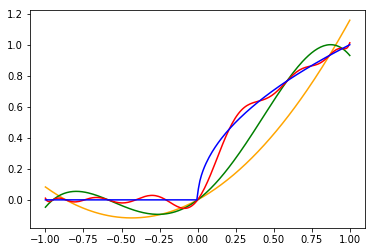

In [430]:
data = chebyNs(0.5, [3,5,15])
plt.plot(data[0], data[2], color="orange")
plt.plot(data[0], data[3], color="green")
plt.plot(data[0], data[4], color="red")
plt.plot(data[0], data[1], color="blue")
plt.show()

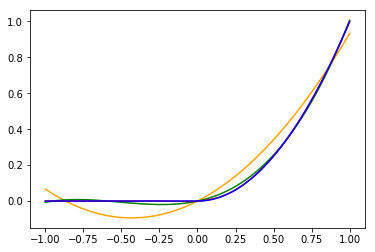

In [431]:
data = chebyNs(2, [3,5,15])
plt.plot(data[0], data[2], color="orange")
plt.plot(data[0], data[3], color="green")
plt.plot(data[0], data[4], color="red")
plt.plot(data[0], data[1], color="blue")
plt.show()

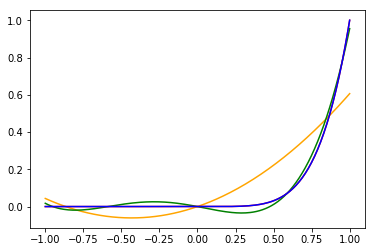

In [433]:
data = chebyNs(5, [3,5,15])
plt.plot(data[0], data[2], color="orange")
plt.plot(data[0], data[3], color="green")
plt.plot(data[0], data[4], color="red")
plt.plot(data[0], data[1], color="blue")
plt.show()

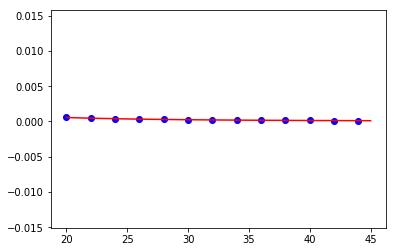

In [441]:
ns = np.array(range(20,45,2))
data = np.array(chebyNs(0.5, ns))
maxima = []
for i in range(2, len(data)):
    maxima.append(maxNorm(data[1], data[i]))

fit = np.polyfit(np.log(ns),np.log(maxima), deg=1)
xs = np.linspace(20,45,100)
ys = np.exp(fit[1])*xs**fit[0]
plt.scatter(ns, maxima, color="blue")
plt.plot(xs, ys, color="red")
plt.show()